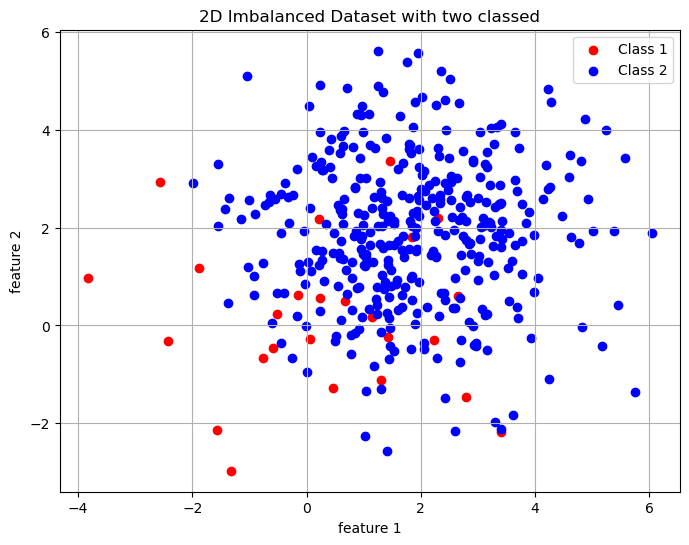

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import xgboost as xgb
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

np.random.seed(42)

n_samples_1 = 25
n_samples_2 = 375
centers = [(0,0),(2,2)]
cluster_std = [1.5,1.5]

X,y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                 centers = centers,
                 cluster_std=cluster_std,
                 random_state=0)

plt.figure(figsize=(8,6))
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red', label='Class 1')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue', label='Class 2')
plt.title('2D Imbalanced Dataset with two classed')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


classification report : 
              precision    recall  f1-score   support

           0       1.00      0.29      0.44         7
           1       0.96      1.00      0.98       113

    accuracy                           0.96       120
   macro avg       0.98      0.64      0.71       120
weighted avg       0.96      0.96      0.95       120

roc auc score : 0.9557522123893806


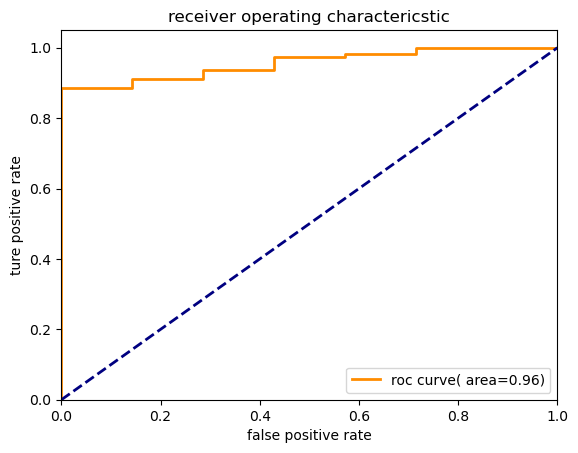

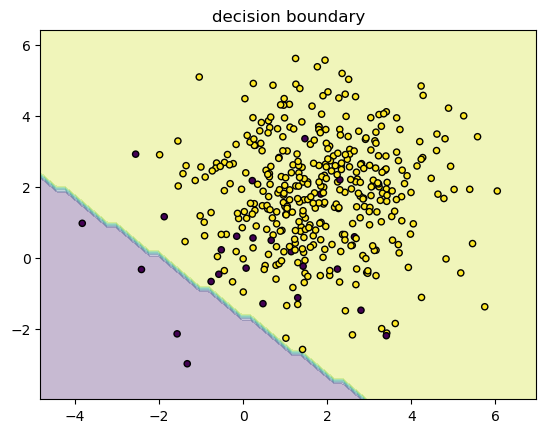

In [3]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)[:,1]

print("classification report : ")
print(classification_report(y_test, y_pred))

print("roc auc score :", roc_auc_score(y_test, y_proba))

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=2, label ='roc curve( area=%0.2f)' %roc_auc_score(y_test,y_proba))
plt.plot([0,1],[0,1], color='navy', lw=2,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('ture positive rate')
plt.title('receiver operating charactericstic')
plt.legend(loc="lower right")
plt.show()


def plot_decision_boundaries(X,y, model):
    plot_step = 0.2
    x_min, x_max = X[:,0].min() -1,X[:,0].max()+1
    y_min, y_max = X[:,1].min() -1,X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_step),np.arange(y_min,y_max,plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20)
    plt.title("decision boundary")
    plt.show()

plot_decision_boundaries(X,y, classifier)
    

Random Undersampling

In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


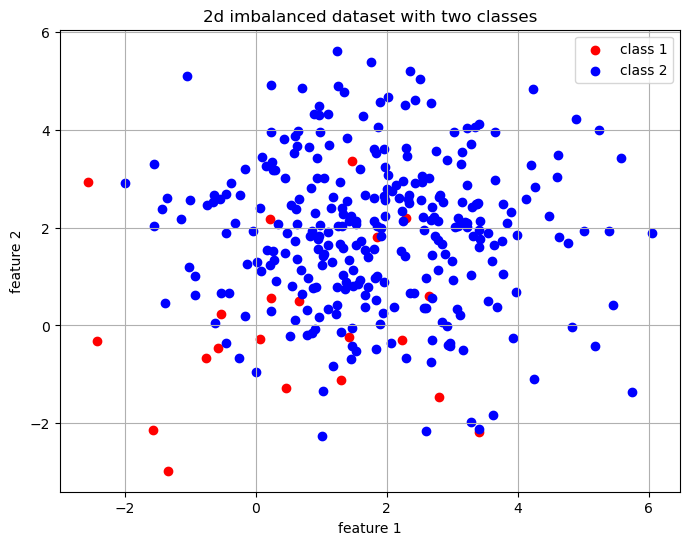

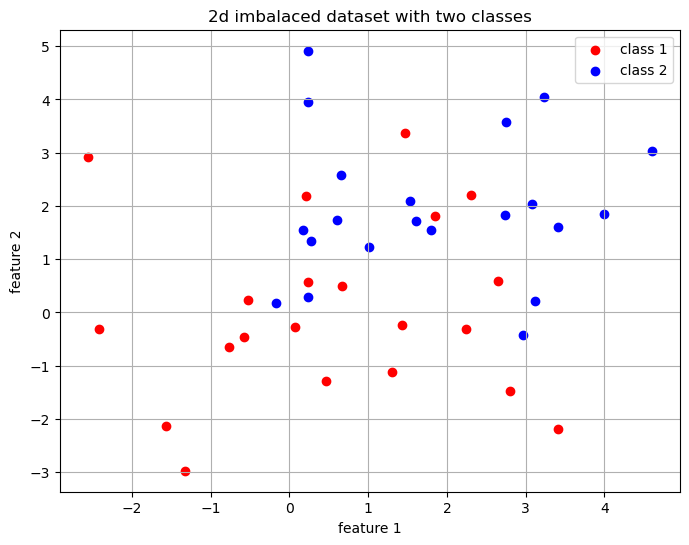

In [6]:
from imblearn.under_sampling import RandomUnderSampler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train == 0] [:,0], X_train[y_train ==0][:,1],color='red', label='class 1')
plt.scatter(X_train[y_train ==1] [:,0], X_train[y_train ==1][:,1], color='blue', label='class 2')
plt.title('2d imbalanced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_resampled[y_resampled == 0][:,0], X_resampled[y_resampled == 0][:,1], color='red', label='class 1')
plt.scatter(X_resampled[y_resampled == 1][:,0], X_resampled[y_resampled == 1][:,1], color='blue',label='class 2')
plt.title('2d imbalaced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
X_train.shape

(320, 2)

In [8]:
X_resampled.shape

(42, 2)

In [9]:
import pandas as pd
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [10]:
pd.Series(y_resampled).value_counts()

0    21
1    21
Name: count, dtype: int64

classification report (with over sampling) :
              precision    recall  f1-score   support

           0       0.18      1.00      0.31         4
           1       1.00      0.76      0.87        76

    accuracy                           0.78        80
   macro avg       0.59      0.88      0.59        80
weighted avg       0.96      0.78      0.84        80

ros auc score (with over sampling): 0.9375


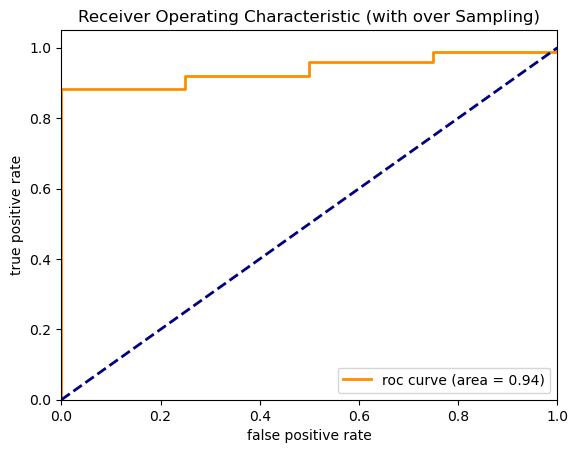

C:\Users\shiva\AppData\Local\Temp\ipykernel_18676\2706288849.py:33: UserWarning: The following kwargs were not used by contour: 'aplha'
  plt.contourf(xx, yy, Z, aplha=0.3)
C:\Users\shiva\AppData\Local\Temp\ipykernel_18676\2706288849.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


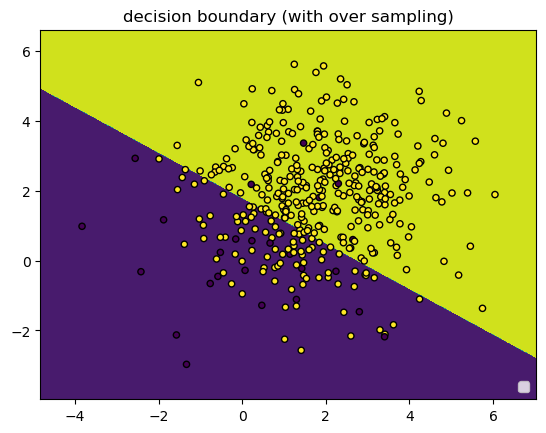

In [20]:
from sklearn.linear_model import LogisticRegression

classifier_rus = LogisticRegression()
classifier_rus.fit(X_resampled, y_resampled)

y_pred_rus= classifier_rus.predict(X_test)
y_proba_rus = classifier_rus.predict_proba(X_test)[:,1]

print("classification report (with over sampling) :")
print(classification_report(y_test, y_pred_rus))

print("ros auc score (with over sampling):", roc_auc_score(y_test, y_proba_rus))

fpr_rus, tpr_rus, _= roc_curve(y_test, y_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2,label='roc curve (area = %0.2f)' % roc_auc_score(y_test, y_proba_rus))
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operating Characteristic (with over Sampling)')
plt.legend(loc="lower right")
plt.show()

def plot_decision_boundaries_ros(X,y,model):
    plot_step=0.02
    x_min,x_max = X[:,0].min() -1, X[:,0].max()+1
    y_min,y_max = X[:,1].min() -1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, aplha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', s=20)
    plt.title("decision boundary (with over sampling)")
    plt.legend(loc="lower right")
    plt.show()

plot_decision_boundaries_ros(X,y,classifier_rus)

Random Oversampling

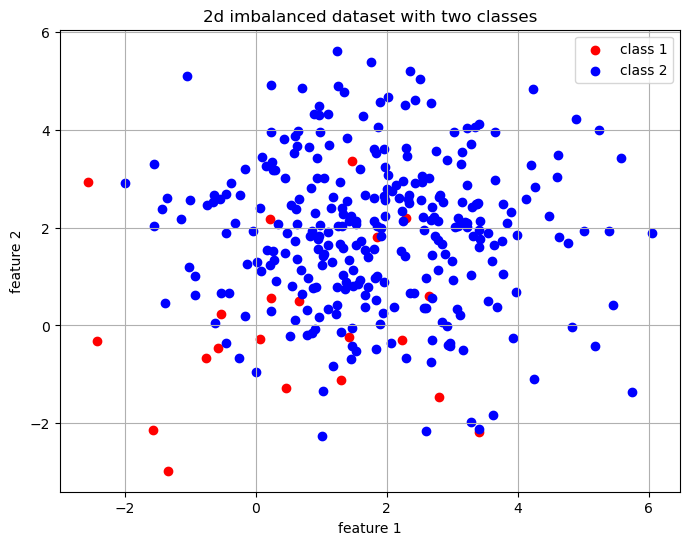

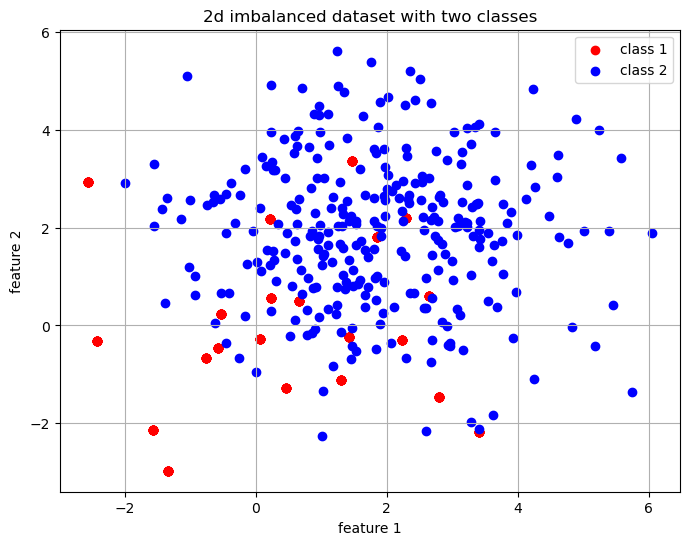

In [21]:
from imblearn.over_sampling import RandomOverSampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

plt.figure(figsize=(8,6))
plt.scatter(X_train[y_train ==0][:,0], X_train[y_train == 0][:,1],color='red', label='class 1')
plt.scatter(X_train[y_train ==1][:,0], X_train[y_train == 1][:,1], color='blue', label='class 2')
plt.title('2d imbalanced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(X_resampled[y_resampled == 0][:,0], X_resampled[y_resampled == 0][:,1], color='red', label='class 1')
plt.scatter(X_resampled[y_resampled == 1][:,0], X_resampled[y_resampled == 1][:,1], color='blue',label='class 2')
plt.title('2d imbalanced dataset with two classes')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
X_train.shape

(320, 2)

In [23]:
X_resampled.shape

(598, 2)

In [24]:
pd.Series(y_train).value_counts()

1    299
0     21
Name: count, dtype: int64

In [25]:
pd.Series(y_resampled).value_counts()

1    299
0    299
Name: count, dtype: int64

In [ ]:
https://colab.research.google.com/drive/1oHwgsV6_DHt-m-Hxl8DuM-BQbKJrqvcK?usp=sharing#scrollTo=H9cJsK4APbHz